In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dt = np.dtype([('instance_no', int),
               ('exp_no', int),
               ('method', int), # 1 = white box, 2 = euclidean_PCA, 3 = hog, 4 = euclidean_PCA category, 5 = hog category, 6 = ais
               ('pca_n', int),
               ('percentage_of_data', float),
               ('percentile', float),
               ('mc_euclidean_no_batches', int), # stuff
               ('mc_hog_no_batches', int), # stuff
               ('sigma_ais', float),
               ('mc_attack_log', float),
               ('mc_attack_eps', float),
               ('mc_attack_frac', float), 
               ('mc_attack_log_50', float), 
               ('mc_attack_eps_50', float),
               ('mc_attack_frac_50', float),
               ('white_box_50', float),
               ('white_box_11', float),
               ('ais_50', float),
               ('ais_acc_rate_50', float),
               ('successful_sum_attack_1', float),
               ('successful_sum_attack_2', float),
               ('successful_sum_attack_3', float),
              ])

In [25]:
data = pd.DataFrame(np.loadtxt('CIFAR10_MC_ATTACK.csv', dtype=dt))

data = data.assign(mem_inf_adv_mc_log = lambda x: (x.mc_attack_log_50-0.5)*2)
data = data.assign(mem_inf_adv_mc_ones = lambda x: (x.mc_attack_eps_50-0.5)*2)
data = data.assign(mem_inf_adv_wb = lambda x: (x.white_box_50-0.5)*2)
data = data.assign(mem_inf_adv_ais = lambda x: (x.ais_50-0.5)*2)

def convert_to_set_prob(x):
    prob = np.zeros((len(x),))
    for i in range(len(x)):
        if x[i] > 0:
            prob[i] = 1
        elif x[i] == 0:
            prob[i] = 0.5
        elif x[i] < 0:
            prob[i] = 0
    return prob

data = data.assign(set_accuracy_mc_log = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_log))
data = data.assign(set_accuracy_mc_ones = lambda x: convert_to_set_prob(x.mem_inf_adv_mc_ones))
data = data.assign(set_accuracy_wb = lambda x: convert_to_set_prob(x.mem_inf_adv_wb))
data = data.assign(set_accuracy_ais = lambda x: convert_to_set_prob(x.mem_inf_adv_ais))

data = data.assign(set_mem_inf_adv_mc_log = lambda x: 2*x.set_accuracy_mc_log-1)
data = data.assign(set_mem_inf_adv_mc_ones = lambda x: 2*x.set_accuracy_mc_ones-1)
data = data.assign(set_mem_inf_adv_wb = lambda x: 2*x.set_accuracy_wb-1)
data = data.assign(set_mem_inf_adv_ais = lambda x: 2*x.set_accuracy_ais-1)

white_box = data[data.method == 1]
pca = data[data.method == 2]
hog = data[data.method == 3]
pca_cat = data[data.method == 4]
hog_cat = data[data.method == 5]
ais = data[data.method == 6]
color_hist = data[data.method == 8]
rec_attack = data[data.method == 42]



# Reconstruction Attack

In [26]:
print(rec_attack.mc_attack_eps_50.mean()*100)
print(rec_attack.set_accuracy_mc_ones.mean()*100)

98.52499999999999
100.0


In [27]:
np.round(rec_attack.groupby(['percentile']).std()[['mc_attack_eps_50']]*100
/np.sqrt(rec_attack.groupby(['percentile']).count()[['mc_attack_eps_50']]),2)

,mc_attack_eps_50
percentile,
0.0,0.15


# PCA
0.1 mc_attack_log_50

In [28]:
pca.pca_n.unique()

array([120], dtype=int64)

In [29]:
pca_opt_dim = pca[pca.pca_n == 120]

opt_perc = -1

pca_opt_perc = pca_opt_dim[pca_opt_dim.percentile == opt_perc]

print(pca_opt_dim[pca_opt_dim.percentile == opt_perc].mc_attack_eps_50.mean())
print(pca_opt_dim[pca_opt_dim.percentile == opt_perc].set_accuracy_mc_ones.mean())

0.518
0.725


In [30]:
np.round(100*pca_opt_dim.groupby(['percentile']).mean()[['set_accuracy_mc_ones','set_accuracy_mc_log']],2)

,set_accuracy_mc_ones,set_accuracy_mc_log
percentile,,
-1.0,72.5,48.75


In [31]:
np.round(pca_opt_dim.groupby(['percentile']).std()[['set_accuracy_mc_ones']]*100
/np.sqrt(pca_opt_dim.groupby(['percentile']).count()[['set_accuracy_mc_ones']]),2)

,set_accuracy_mc_ones
percentile,
-1.0,6.19


In [32]:
np.round(100*pca_opt_dim.groupby(['percentile']).mean()[['mc_attack_eps_50']],2)

,mc_attack_eps_50
percentile,
-1.0,51.8


In [33]:
np.round(pca_opt_dim.groupby(['percentile']).std()[['mc_attack_eps_50']]*100
/np.sqrt(pca_opt_dim.groupby(['percentile']).count()[['mc_attack_eps_50']]),2)

,mc_attack_eps_50
percentile,
-1.0,0.4


# Color Histogram
0.1 mc_attack_log_50

In [34]:
color_hist

,instance_no,exp_no,method,pca_n,percentage_of_data,percentile,mc_euclidean_no_batches,mc_hog_no_batches,sigma_ais,mc_attack_log,...,mem_inf_adv_wb,mem_inf_adv_ais,set_accuracy_mc_log,set_accuracy_mc_ones,set_accuracy_wb,set_accuracy_ais,set_mem_inf_adv_mc_log,set_mem_inf_adv_mc_ones,set_mem_inf_adv_wb,set_mem_inf_adv_ais
1,1801,0,8,0,0.1,-1.0,50,0,0.0,0.0954,...,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
3,1801,1,8,0,0.1,-1.0,50,0,0.0,0.0907,...,-1.0,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,-1.0
5,1801,2,8,0,0.1,-1.0,50,0,0.0,0.0897,...,-1.0,-1.0,1.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0
7,1801,3,8,0,0.1,-1.0,50,0,0.0,0.0918,...,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0
9,1801,4,8,0,0.1,-1.0,50,0,0.0,0.0912,...,-1.0,-1.0,1.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0
11,1962,0,8,0,0.1,-1.0,50,0,0.0,0.0898,...,-1.0,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,-1.0
13,1962,1,8,0,0.1,-1.0,50,0,0.0,0.0887,...,-1.0,-1.0,0.0,1.0,0.0,0.0,-1.0,1.0,-1.0,-1.0
15,1962,2,8,0,0.1,-1.0,50,0,0.0,0.0893,...,-1.0,-1.0,1.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0
17,1962,3,8,0,0.1,-1.0,50,0,0.0,0.0906,...,-1.0,-1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.0,-1.0
19,1962,4,8,0,0.1,-1.0,50,0,0.0,0.0917,...,-1.0,-1.0,1.0,0.0,0.0,0.0,1.0,-1.0,-1.0,-1.0


In [35]:
color_hist_opt_perc = color_hist[color_hist.percentile == opt_perc]

opt_perc = -1

print(color_hist[color_hist.percentile == opt_perc].set_accuracy_mc_log.mean())
print(color_hist[color_hist.percentile == opt_perc].set_accuracy_mc_ones.mean())

0.5875
0.5


In [36]:
np.round(100*color_hist.groupby(['percentile']).mean()[['set_accuracy_mc_ones','set_accuracy_mc_log']],2)

,set_accuracy_mc_ones,set_accuracy_mc_log
percentile,,
-1.0,50.0,58.75


In [37]:
np.round(color_hist.groupby(['percentile']).std()[['set_accuracy_mc_ones','set_accuracy_mc_log']]*100
/np.sqrt(color_hist.groupby(['percentile']).count()[['set_accuracy_mc_ones','set_accuracy_mc_log']]),2)

,set_accuracy_mc_ones,set_accuracy_mc_log
percentile,,
-1.0,7.6,6.91


In [38]:
np.round(100*color_hist.groupby(['percentile']).mean()[['mc_attack_eps_50']],2)

,mc_attack_eps_50
percentile,
-1.0,49.83


In [39]:
np.round(100*color_hist.groupby(['percentile']).std()[['mc_attack_eps_50']]/np.sqrt(color_hist.groupby(['percentile']).count()[['mc_attack_eps_50']]),2)

,mc_attack_eps_50
percentile,
-1.0,0.55


[98.525 51.8   49.825]
[0.152 0.397 0.555]
[100.   72.5  50. ]
[0.    6.189 7.596]


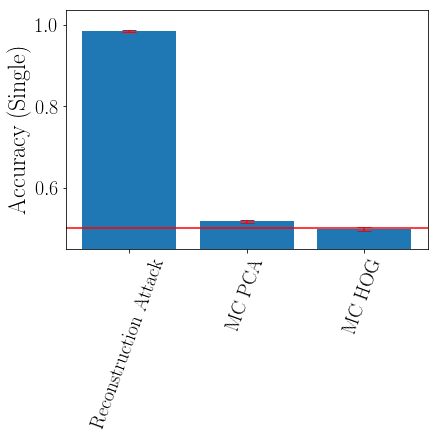

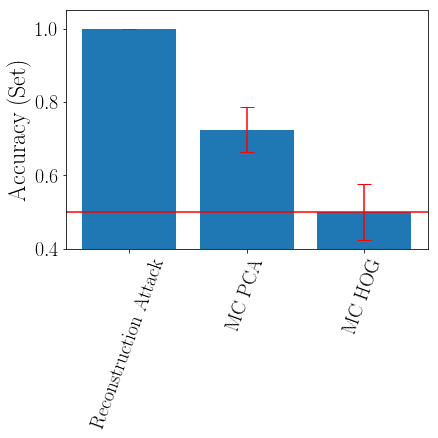

In [41]:
def calc_error(data):
    return data.std()/np.sqrt(len(data))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 20})

f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

names = ['Reconstruction Attack','MC PCA', 'MC HOG']
N = len(names)
ind = np.arange(N)

y = [#white_box.white_box_50.mean(), 
                               rec_attack.mc_attack_eps_50.mean(), 
                               #pca_opt_perc.mc_attack_log_50.mean(),
                               #pca_opt_perc.mc_attack_eps_50.mean(),
                               #hog_opt_perc.mc_attack_log_50.mean(),
                               #hog_opt_perc.mc_attack_eps_50.mean(),
                               pca_opt_perc.mc_attack_eps_50.mean(),
                               #pca_cat_opt_perc.mc_attack_eps_50.mean(),
                               color_hist_opt_perc.mc_attack_eps_50.mean()]
                               #hog_cat_opt_perc.mc_attack_eps_50.mean()]
    
print(np.round(100*np.array(y),3))

rects1 = ax.bar(ind,  y)

e = [#calc_error(white_box.white_box_50), 
                               calc_error(rec_attack.mc_attack_eps_50), 
                               #calc_error(pca_opt_perc.mc_attack_log_50), 
                               #calc_error(pca_opt_perc.mc_attack_eps_50), 
                               #calc_error(hog_opt_perc.mc_attack_log_50), 
                               #calc_error(hog_opt_perc.mc_attack_eps_50),
                               calc_error(pca_opt_perc.mc_attack_eps_50), 
                               #calc_error(pca_cat_opt_perc.mc_attack_eps_50), 
                               calc_error(color_hist_opt_perc.mc_attack_eps_50)] 
                               #calc_error(hog_cat_opt_perc.mc_attack_eps_50)]

print(np.round(100*np.array(e),3))
    
np.save('y_single_cvae',y)
np.save('e_single_cvae',e)

plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)


plt.ylim(ymin=0.45)
plt.axhline(y=0.5, color='r', linestyle='-')

plt.ylabel('Accuracy (Single)', fontsize='large')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='70')

ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)

f = plt.figure(figsize=(7, 7))
ax = plt.subplot()

ind = np.arange(N)

y = [#white_box.set_accuracy_wb.mean(), 
                               rec_attack.set_accuracy_mc_ones.mean(), 
                               #pca_opt_perc.set_accuracy_mc_log.mean(),
                               #pca_opt_perc.set_accuracy_mc_ones.mean(),
                               #hog_opt_perc.set_accuracy_mc_log.mean(),
                               #hog_opt_perc.set_accuracy_mc_ones.mean(),
                               pca_opt_perc.set_accuracy_mc_ones.mean(),
                               #pca_cat_opt_perc.set_accuracy_mc_ones.mean(),
                               color_hist_opt_perc.set_accuracy_mc_ones.mean()]
                               #hog_cat_opt_perc.set_accuracy_mc_ones.mean()]
    
print(np.round(100*np.array(y),3))
rects1 = ax.bar(ind, y)

e = [#calc_error(white_box.set_accuracy_wb), 
                               calc_error(rec_attack.set_accuracy_mc_ones), 
                               #calc_error(pca_opt_perc.set_accuracy_mc_log), 
                               #calc_error(pca_opt_perc.set_accuracy_mc_ones), 
                               #calc_error(hog_opt_perc.set_accuracy_mc_log), 
                               #calc_error(hog_opt_perc.set_accuracy_mc_ones),
                               calc_error(pca_opt_perc.set_accuracy_mc_ones), 
                               #calc_error(pca_cat_opt_perc.set_accuracy_mc_ones), 
                               calc_error(color_hist_opt_perc.set_accuracy_mc_ones)]
                               #calc_error(hog_cat_opt_perc.set_accuracy_mc_ones)]
    
print(np.round(100*np.array(e),3))

np.save('y_set_cvae',y)
np.save('e_set_cvae',e)

plt.errorbar(ind, y, e, color='r', linestyle='None', capsize=7)

plt.ylabel('Accuracy (Set)', fontsize='large')

plt.ylim(ymin=0.4)
plt.axhline(y=0.5, color='r', linestyle='-')

ax.set_xticks(ind)
plt.setp(ax.get_xticklabels(), rotation='70')
ax.set_xticklabels(names)

plt.tight_layout(pad=2, w_pad=2, h_pad=2)
plt.savefig('GAN_MNIST_Mem_Inf_10_Perc.pgf', bbox_inches="tight")
    
plt.show()